In [208]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

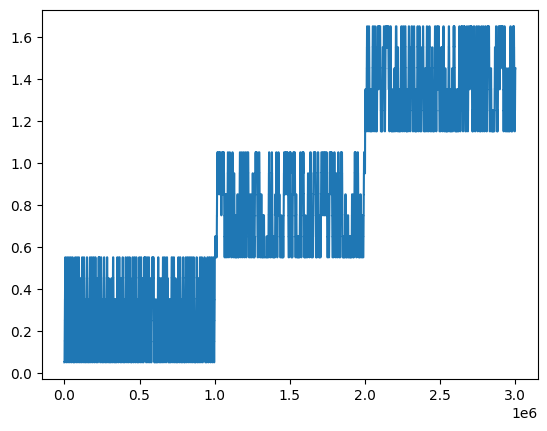

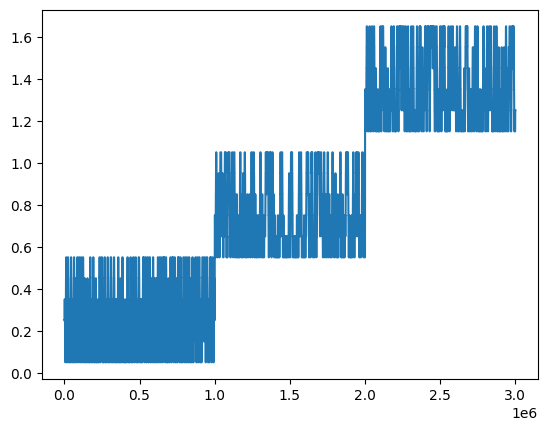

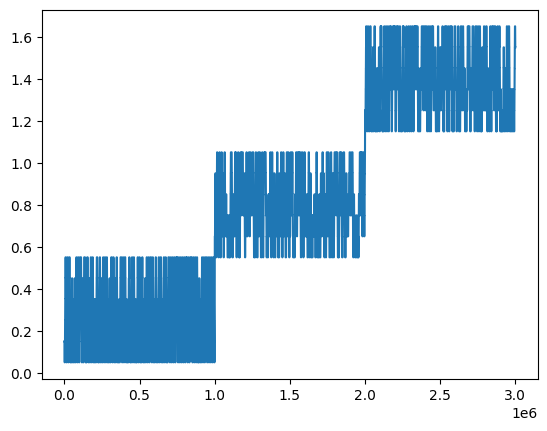

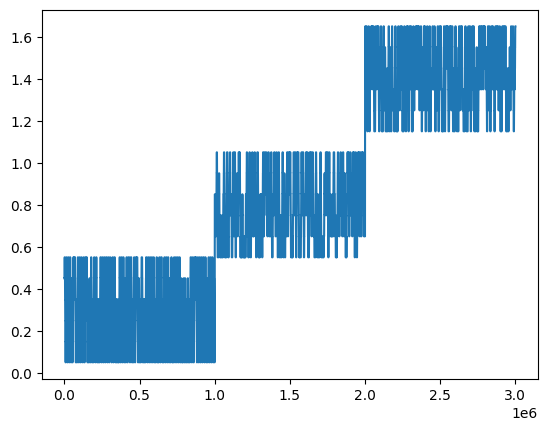

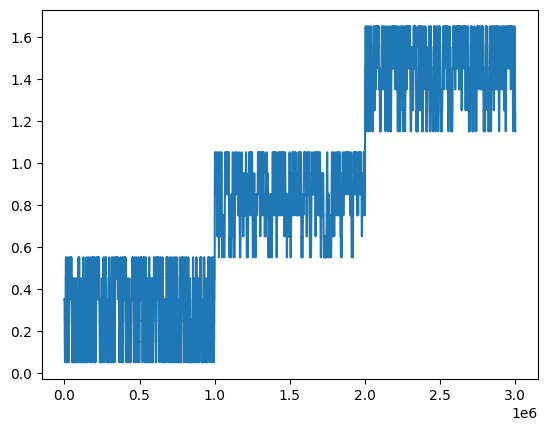

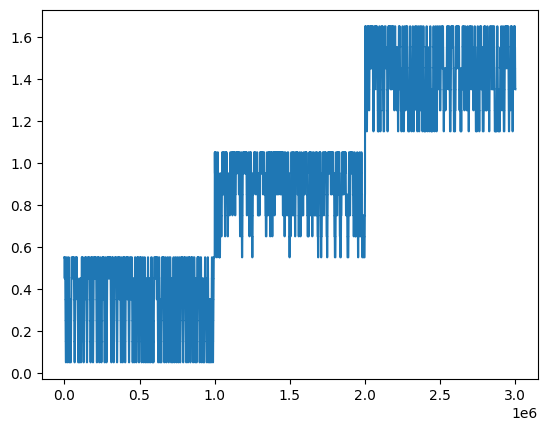

In [217]:
procesos_dfs = []
for idx in range(6):
    procesos_dfs.append(pd.read_csv("../PT-Data/DatosProceso"+str(idx)+".csv",delimiter="\t"))
    plt.plot(procesos_dfs[idx]["Temperatura"])
    plt.show()

In [210]:
dfs = pd.concat(procesos_dfs, join="inner")
temp_list = sorted(list(dfs["Temperatura"].value_counts().index))
print(temp_list)

[0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05, 1.15, 1.25, 1.35, 1.45, 1.55, 1.65]


In [211]:
e_timeseries = []
m_timeseries = []
nSpins = 24*4

for t in temp_list:
    e_timeseries.append(np.array(dfs[dfs["Temperatura"] == t]["Energia"].to_list()))
    m_timeseries.append(np.array(dfs[dfs["Temperatura"] == t]["Magnetizacion"].to_list()))

In [212]:
e_mean = []
m_mean = []
cv_mean = []

for idx, t in enumerate(temp_list):
    e = e_timeseries[idx]
    m = m_timeseries[idx]
    e0 = np.mean(e)
    e_mean.append(np.mean(e)/(nSpins))
    m_mean.append(np.mean(m)/(nSpins))
    cv_mean.append((np.mean(np.power(e,2))-e0*e0)/(t*t*nSpins))

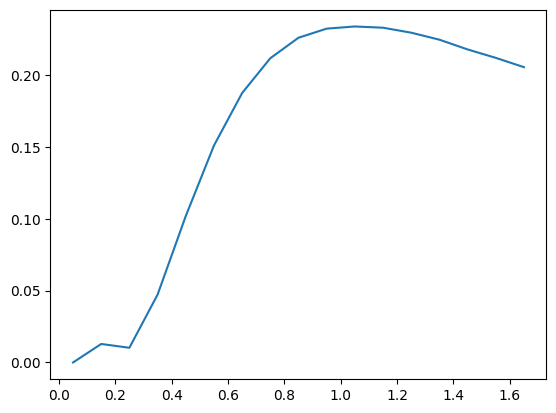

In [216]:
plt.plot(temp_list,cv_mean)